### <a id='overview'>1. Overview</a>

#### Motivation
- To create word clouds that give a glance of the achievement of the NBA legend Shaquille O'Neal. 
- Shaq particularly suits for creation of word clouds due to his signature dunk
- The final word cloud is filled with Shaq's **NBA** accomplishment and is shown below.

<img src="./shaq_folder/selected/Shaq_plasma_100.png" width="650" align="center"/>


#### Method
- The word clouds were created with the [word cloud library](https://amueller.github.io/word_cloud/auto_examples/index.html).  
- Shaq's NBA achievement data was pulled from [wiki pages](https://en.wikipedia.org/wiki/Shaquille_O%27Neal) and [NBA All Time leader page](https://www.nba.com/stats/alltime-leaders/)
- The color map is chosen so it closely match the color purple and gold in Los Angeles Lakers' uniform, at which Shaq played the majority of his career.

### <a id='sam'>2. About the author: Kam Leung Yeung (Sam)</a>

* PhD in Cognitive Psychology, Iowa State University in Ames, Iowa, USA

**Social media**:

* [LinkedIn](https://www.linkedin.com/in/kamleungyeung/)
* [Google Scholar](https://scholar.google.com/citations?user=OwUmaN8AAAAJ)
* [GitHub](https://github.com/k-l-yeung)
* [Tableau](https://public.tableau.com/app/profile/kam.leung.yeung#!/)


#### Other notes
- Mask preprocessing hint: change the mask photo to black and white image first  
- Color scheme / map can be chosen at [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)  

### <a id='toc'>3. Table of content</a>

1. <a href='#overview'>Overview</a>  
2. <a href='#sam'>About the author: Kam Leung Yeung</a> 
3. <a href='#toc'>Table of content</a> 
4. <a href='#import'>Import libraries</a>  
5. <a href='#shaq'>Profile for Shaquille O'Neal</a>  
6. <a href='#wc'>Creating the word clouds</a>  



### <a id='import'>4. Import libraries</a>

<a href='#toc'>Back to table of content</a>

In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import os

<a href='#toc'>Back to table of content</a>

### <a id='shaq'>5. Profile for Shaquille O'Neal</a>

In [2]:
# create relative folder for Shaq
if os.path.isdir('shaq_mask') is False:
  os.makedirs('shaq_mask')
if os.path.isdir('./shaq_folder') is False:
  os.makedirs('./shaq_folder')
s_folder = './shaq_folder/'

In [3]:
# profile for Shaquille O'Neal

# create masks that contains the shape that the word cloud propagate into
mask_shaq = np.array(Image.open('./shaq_mask/shaq_2_5x.jpg')) 

shaq_mask = [mask_shaq]

# Try various colors that represent his most relevant teams, including Los Angeles Lakers and Miami Heat 
s_cmap1 = 'plasma' # purple, yellow, reddish orange
s_cmap2 = 'gnuplot'
s_cmap3 = 'spring'

s_cmap = ['plasma', 'gnuplot', 'spring']


In [4]:
s_text = """
4xChampion
3xFinalsMVP
MVP
15xAll-Star
3xAll-StarMVP
8xFirstTeam
RookieOfTheYear
75thAnnivTeam
Lakers
2xScoringChamp
#34
28596Pts
13099Rebs
2732Blks
1207GP
"""

<a href='#toc'>Back to table of content</a>

### <a id='wc'>6. Creating the word clouds</a>

In [8]:
# words to be excluded from the word cloud
stopwords = STOPWORDS

# try various maximum font size
max_font = [50, 75, 100]

In [6]:
def wc(mask_name, mask, cmap, text, max_font, folder):

    # create a meaningful filename
    filename = mask_name + "_" + cmap + "_" + str(max_font)+".png"
    
    # create the word cloud object
    wc=WordCloud(
        random_state=1,
        background_color = 'white',
        mask = mask,
#         min_font_size = 5,
        max_font_size = max_font, # small font size will better fill the mask to make the mask's shape recognizable
        max_words = 500,
        stopwords = stopwords,
        relative_scaling = 0,
        repeat = True,
        colormap = cmap,
        min_word_length = 3,
        include_numbers = True,
    #     contour_width = 1, 
    #     contour_color = 'black',
    #     height=600,
    #     width=1200  
    )

    # choose to run one of the following lines to run
    # wc.generate(text)
    wc.generate_from_text(text) # Create a word_cloud from words and frequencies.

    # match word cloud text color to the mask's
    # image_colors = ImageColorGenerator(mask_dna) # 
    # wc.recolor(color_func = image_colors)

    # re-color
#     mask_usa = np.array(Image.open('usa.jpg'))
#     image_colors = ImageColorGenerator(mask_usa)
#     wc.recolor(color_func=image_colors)

    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    wc.to_file(folder+filename)


Shaq word cloud

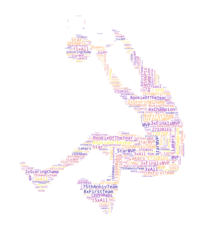

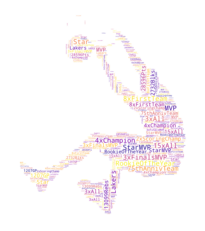

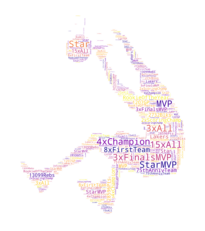

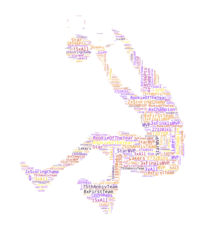

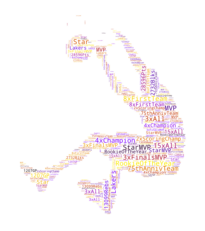

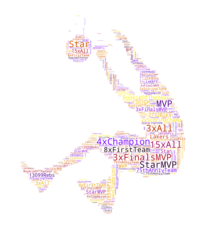

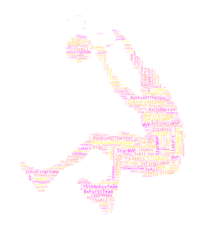

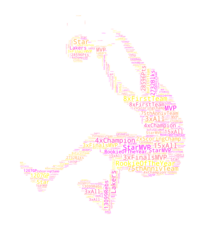

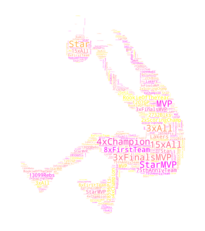

In [7]:
for index, mask in enumerate(shaq_mask):
    for cmap in s_cmap:
        for fontsize in max_font:
            wc("Shaq", mask, cmap, s_text, fontsize, s_folder)

<a href='#toc'>Back to table of content</a>